In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import datasets
from sklearn import neighbors
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures



df = pd.read_csv('/content/car_prices.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [4]:
df = df.drop_duplicates()
df = df.dropna()
df.shape

(472325, 16)

In [5]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13837.058964,13690.512058
std,3.822151,13.286866,51939.586894,9532.229273,9613.033738
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,35.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,41.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


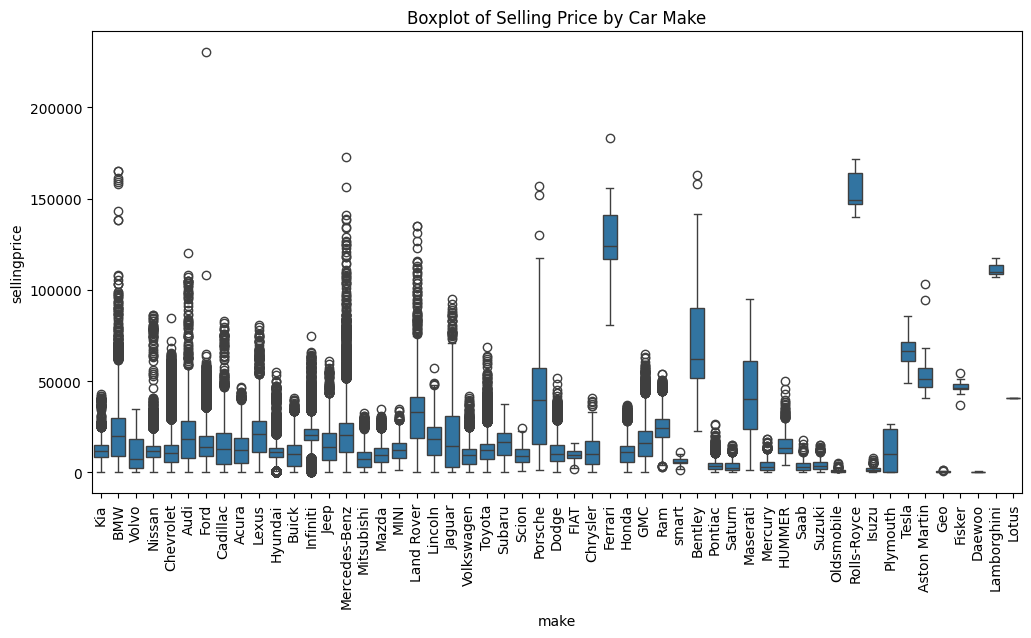

In [6]:

# Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="make", y="sellingprice")
plt.xticks(rotation=90)
plt.title("Boxplot of Selling Price by Car Make")
plt.show()

In [7]:
# Drop rows with missing values in key numerical columns
df = df.dropna(subset=["sellingprice", "odometer", "mmr"])

# -----------------------------
# Function to remove outliers using IQR
# -----------------------------
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# -----------------------------
# Apply to multiple columns
# -----------------------------
columns_to_clean = ["sellingprice", "odometer", "mmr"]

df_cleaned = df.copy()
for col in columns_to_clean:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

# -----------------------------
# Summary
# -----------------------------
print("Original shape:", df.shape)
print("Shape after removing outliers:", df_cleaned.shape)

# Save to new CSV (optional)
# df_cleaned.to_csv("car_prices_no_outliers.csv", index=False)



Original shape: (472325, 16)
Shape after removing outliers: (445982, 16)


In [8]:
df.shape

(472325, 16)

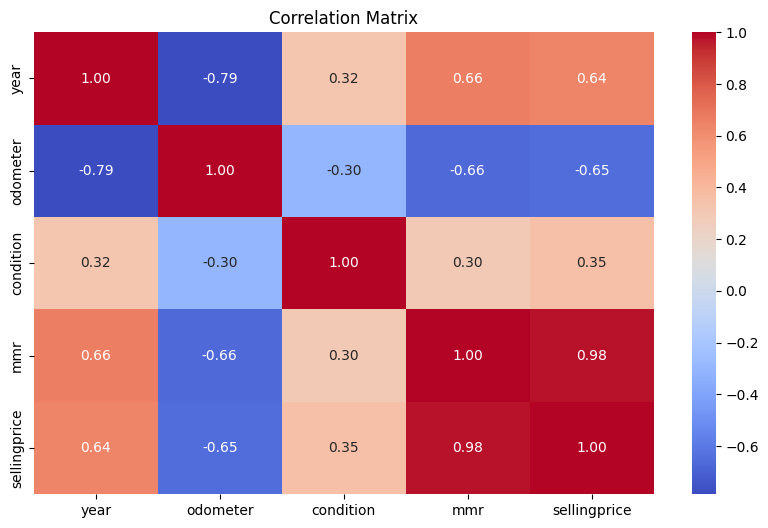

In [9]:
# Correlation Matrix
# -------------------------------
numeric_cols = ["year", "odometer", "condition", "mmr", "sellingprice"]
correlation_matrix = df_cleaned[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


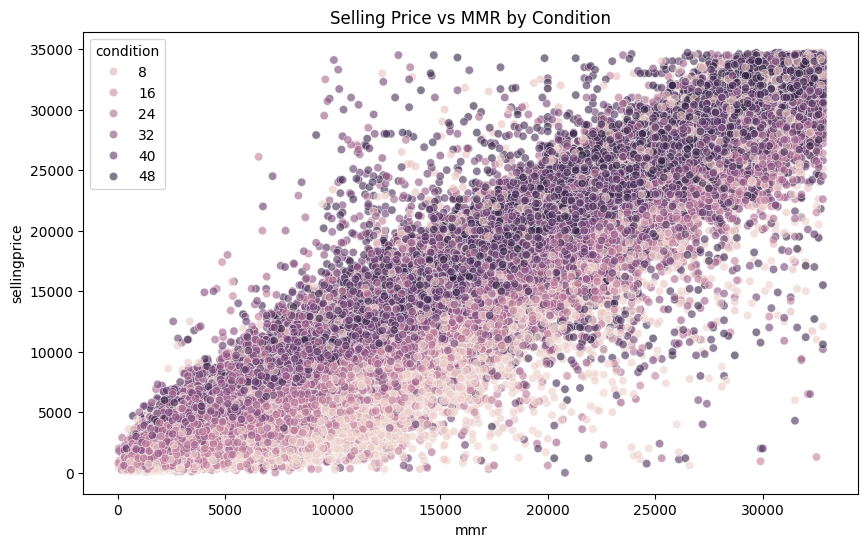

In [10]:
# Scatter Plots
# -------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x="mmr", y="sellingprice", hue="condition", alpha=0.6)
plt.title("Selling Price vs MMR by Condition")
plt.show()


In [11]:
# Define allowed body types
body_types = ['suv', 'sedan', 'convertible', 'coupe', 'crew cab', 'van', 'wagon']

# Convert to lowercase for consistency (optional)
df['body'] = df['body'].str.lower()

# Filter dataset
df_filtered = df[df['body'].isin(body_types)]

# Check result
print(df_filtered['body'].value_counts())

body
sedan          211298
suv            120968
coupe           15960
crew cab        14249
wagon           14223
convertible      9318
van              3513
Name: count, dtype: int64


In [12]:
df_filtered.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [13]:
variables_in_study = df_filtered[['year', 'odometer','condition','mmr','sellingprice']]

scaler = StandardScaler()
scaler.fit(variables_in_study)
X = scaler.transform(variables_in_study)

X = pd.DataFrame(X, columns = ['year', 'odometer','condition','mmr','sellingprice'])
independent_variables = X[['year', 'odometer','condition','mmr']]
dependent_variable = X['sellingprice']

In [14]:
variables_in_study.head()

,year,odometer,condition,mmr,sellingprice
0,2015,16639.0,5.0,20500.0,21500.0
1,2015,9393.0,5.0,20800.0,21500.0
2,2014,1331.0,45.0,31900.0,30000.0
3,2015,14282.0,41.0,27500.0,27750.0
4,2014,2641.0,43.0,66000.0,67000.0


In [15]:
independent_variables.head()

,year,odometer,condition,mmr
0,1.250211,-0.979970,-1.952152,0.677001
1,1.250211,-1.120557,-1.952152,0.707480
2,0.992091,-1.276976,1.072818,1.835225
3,1.250211,-1.025701,0.770321,1.388191
4,0.992091,-1.251560,0.921570,5.299738


In [16]:
# @title Default title text
dependent_variable.head()

,sellingprice
0,0.787951
1,0.787951
2,1.645243
3,1.418312
4,5.376981


In [17]:
x_train, x_test, y_train, y_test = train_test_split(independent_variables, dependent_variable, test_size=0.2)

In [18]:
print('df_filtered shape is: ', df_filtered.shape)
print('x_train shape is: ',x_train.shape)
print('x_test shape is: ',x_test.shape)
print('y_train shape is: ',y_train.shape)
print('y_test shape is: ',y_test.shape)

df_filtered shape is:  (389529, 16)
x_train shape is:  (311623, 4)
x_test shape is:  (77906, 4)
y_train shape is:  (311623,)
y_test shape is:  (77906,)


In [19]:
MAE_list=[]
MSE_list=[]
RMSE_list=[]
R_Squared_list=[]


def model_evaluation(y_test, predictions):
    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse) # or mse**(0.5)
    r2 = metrics.r2_score(y_test,predictions)

    MAE_list.append(mae)
    MSE_list.append(mse)
    RMSE_list.append(rmse)
    R_Squared_list.append(r2)

    print("Results of sklearn.metrics: \n")
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)

In [20]:
regression_model = sm.OLS(y_train, x_train)
results = regression_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           sellingprice   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                          2.622e+06
Date:                Thu, 17 Jul 2025   Prob (F-statistic):                        0.00
Time:                        14:34:07   Log-Likelihood:                      1.0964e+05
No. Observations:              311623   AIC:                                 -2.193e+05
Df Residuals:                  311619   BIC:                                 -2.192e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year          -0.0177      0.001    -34.973      0.000      -0.019      -0.017
odometer      -0.0045      0.001     -8.985      0.000      -0.005      -0.004
condition      0.0516      0.000    157.474      0.000       0.051       0.052
mmr            0.9778      0.000   2523.572      0.000       0.977       0.979
==============================================================================
Omnibus:                   398350.774   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       8858221261.372
Skew:                           5.538   Prob(JB):                         0.00
Kurtosis:                     828.895   Cond. No.                         3.35
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
  print(results.rsquared)
print(results.rsquared_adj)
print(results.pvalues)
print(results.params)

0.9711417076458716
0.971141337215412
year         1.915380e-267
odometer      2.598571e-19
condition     0.000000e+00
mmr           0.000000e+00
dtype: float64
year        -0.017681
odometer    -0.004505
condition    0.051551
mmr          0.977819
dtype: float64


In [22]:
predictions = results.predict(x_test)

In [23]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.10437600681013394
MSE: 0.02721681853972065
RMSE: 0.16497520583324227
R-Squared: 0.9723578671581644


In [24]:
poly_reg = PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x_train)
poly_reg.fit(x_poly,y_train)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_train)

LinearRegression()

In [25]:
predictions = lin_reg.predict(poly_reg.fit_transform(x_test))

In [26]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.10052690487568725
MSE: 0.026005949817004215
RMSE: 0.16126360350991856
R-Squared: 0.9735876579964472


In [27]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
predictions = dtr.predict(x_test)

In [29]:

model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.138302105035948
MSE: 0.04659032175508934
RMSE: 0.21584791348328883
R-Squared: 0.9526816162874245


In [30]:
rdg = Ridge(alpha = 0.5)
rdg = rdg.fit(x_train, y_train)
predictions = rdg.predict(x_test)

In [31]:
print(rdg.score(x_train, y_train))
print(rdg.coef_)
print(rdg.intercept_)

0.9711417179277602
[-0.01768005 -0.00450603  0.05155122  0.97781659]
-0.0001768441989523831


In [32]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.10438013129384714
MSE: 0.02721709452422681
RMSE: 0.1649760422734974
R-Squared: 0.972357586860878


In [33]:
lasso = Lasso(alpha=0.01)
lasso = lasso.fit(x_train, y_train)
prediction = lasso.predict(x_test)

In [34]:
print(lasso.score(x_train, y_train))
print(lasso.coef_)
print(lasso.intercept_)

0.9708431277647996
[-0.         -0.          0.04099857  0.96314426]
-0.00016227329364974666


In [35]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.10438013129384714
MSE: 0.02721709452422681
RMSE: 0.1649760422734974
R-Squared: 0.972357586860878


In [36]:
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
fit = knn.fit(x_train, y_train)
predictions = fit.predict(x_test)

In [37]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.11096557463915802
MSE: 0.029533542911627967
RMSE: 0.17185325982252408
R-Squared: 0.9700049395831535


In [38]:
models_list = ['Multiple Linear Regression', 'Polynomial Regression', 'Decision Tree Regression', 'Ridge Regression', 'Lasso Regression', 'KNN Regression' ]
#models_list = ['Multiple Linear Regression', 'Polynomial Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Ridge Regression', 'Lasso Regression', 'KNN Regression' ]

models_list

['Multiple Linear Regression',
 'Polynomial Regression',
 'Decision Tree Regression',
 'Ridge Regression',
 'Lasso Regression',
 'KNN Regression']

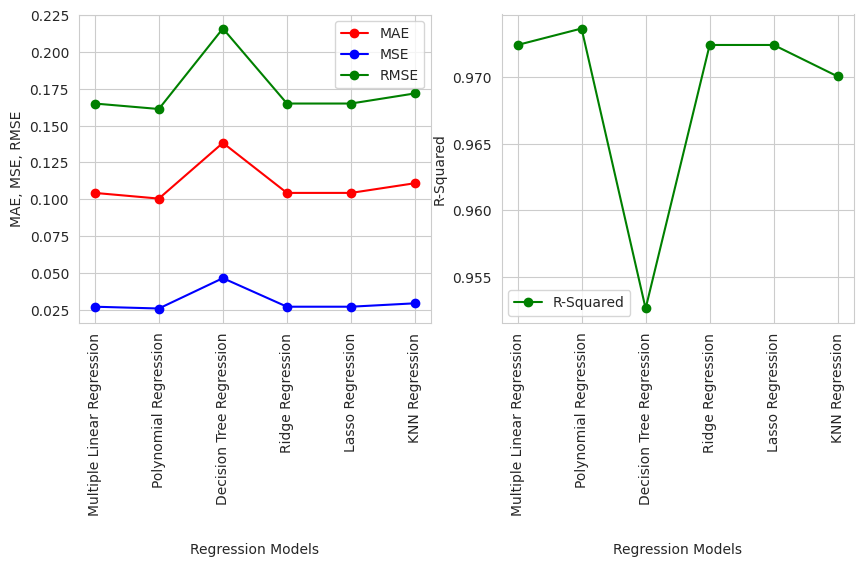

In [39]:
sns.set_style('whitegrid')

fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4));
ax1.plot(MAE_list,color='red', label='MAE', marker="o")
ax1.plot(MSE_list, color='blue', label='MSE', marker="o")
ax1.plot(RMSE_list,color='green', label='RMSE', marker="o")
ax2.plot(R_Squared_list,  color='green', label='R-Squared', marker="o")
ax1.legend()
ax2.legend()
ax1.set_xticks(ticks=range(len(MAE_list)))
ax2.set_xticks(ticks=range(len(R_Squared_list)))
ax1.set_xticklabels(models_list, rotation=90)
ax2.set_xticklabels(models_list, rotation=90)
ax1.set_xlabel('Regression Models', labelpad=20)
ax2.set_xlabel('Regression Models', labelpad=20)
ax1.set_ylabel('MAE, MSE, RMSE')
ax2.set_ylabel('R-Squared')
plt.show()

# for index, value in enumerate(accuracy_score_list):
#     plt.text(index, value+0.020, "%.3f" %value, ha="center")

In [40]:
print(np.min(RMSE_list))
print(np.argmin(RMSE_list))
print(models_list[np.argmin(RMSE_list)])

0.16126360350991856
1
Polynomial Regression


In [41]:
print(np.max(R_Squared_list))
print(np.argmax(R_Squared_list))
print(models_list[np.argmax(R_Squared_list)])

0.9735876579964472
1
Polynomial Regression


# Cluster Analysis

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
clustering = KMeans(n_clusters=3, random_state=5, n_init='auto')
model = clustering.fit(X)

# plot the clusters

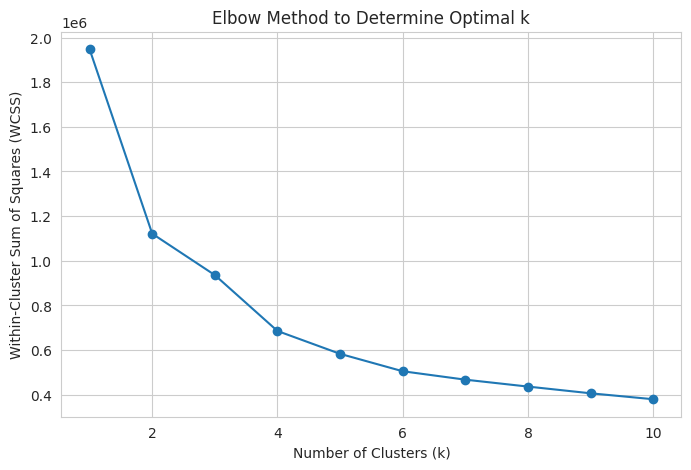

In [44]:
# Elbow method
wcss = []  # Within-cluster sum of squares

K_range = range(1, 11)  # Try k from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

# time series analysis

### SES Simple exponential Smoothing

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import dateutil.parser

# Function to parse date flexibly and handle errors
def parse_flexible_date(date_str):
    try:
        # Try parsing with dateutil which is more flexible
        # Set fuzzy=True to ignore extraneous characters like 'GMT' and timezone names in parentheses
        dt_obj = dateutil.parser.parse(date_str, fuzzy=True)
        # Remove timezone information after parsing
        return dt_obj.tz_localize(None)
    except:
        # If parsing fails, return NaT
        return pd.NaT

# Apply the flexible parsing function to the 'saledate' column
df['saledate'] = df['saledate'].apply(parse_flexible_date)

# Check if the conversion was successful (i.e., if the dtype is datetime-like)
if pd.api.types.is_datetime64_any_dtype(df['saledate']):

    # Check how many dates were unparseable (NaT values)
    unparseable_dates = df['saledate'].isna().sum()
    print(f"Number of unparseable dates: {unparseable_dates}")

    # Aggregate average selling price by date
    # Use dropna() to remove rows where saledate is NaT before grouping
    df_cleaned_dates = df.dropna(subset=['saledate'])

    if df_cleaned_dates.empty:
        print("After parsing and dropping invalid dates, no valid date entries remain.")
        ts_data = pd.Series([], dtype='float64') # Ensure ts_data is defined as an empty Series
    else:
        # Check the frequency of the data
        if df_cleaned_dates['saledate'].min() == df_cleaned_dates['saledate'].max():
            print("All remaining dates are the same. Cannot create a time series.")
            ts_data = pd.Series([], dtype='float64')
        else:
             ts_data = df_cleaned_dates.groupby('saledate')['sellingprice'].mean().asfreq('D').ffill() # Changed fillna(method='ffill') to ffill()


    # Visualize the time series
    plt.figure(figsize=(12, 5))
    if not ts_data.empty:
        ts_data.plot()
        plt.title("Daily Average Selling Price")
        plt.ylabel("Selling Price")
        plt.grid(True)
        plt.show()
    else:
        print("Cannot plot time series data as it is empty after processing.")
else:
    print("Date conversion failed. Could not parse 'saledate' column as datetime.")
    print("Please check the format of the 'saledate' column in the original data.")

Number of unparseable dates: 472325
After parsing and dropping invalid dates, no valid date entries remain.
Cannot plot time series data as it is empty after processing.


<Figure size 1200x500 with 0 Axes>

In [46]:
train = ts_data[:-30]
test = ts_data[-30:]

In [52]:
ses_model = SimpleExpSmoothing(train).fit()
ses_forecast = ses_model.forecast(len(test))

# Evaluate SES
ses_rmse = np.sqrt(mean_squared_error(test, ses_forecast))
ses_mae = mean_absolute_error(test, ses_forecast)
print(f"SES RMSE: {ses_rmse:.2f}, MAE: {ses_mae:.2f}")

IndexError: index 0 is out of bounds for axis 0 with size 0

In [48]:
# Choose ARIMA(p,d,q). Let's start with (5,1,0)
arima_model = ARIMA(train, order=(5,1,0))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test))

# Evaluate ARIMA
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
arima_mae = mean_absolute_error(test, arima_forecast)
print(f"ARIMA RMSE: {arima_rmse:.2f}, MAE: {arima_mae:.2f}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:4008: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:534: RuntimeWarning: invalid value encountered in scalar divide
  return -self.loglike(params, *args) / nobs


LinAlgError: Schur decomposition solver error.

NameError: name 'ses_forecast' is not defined

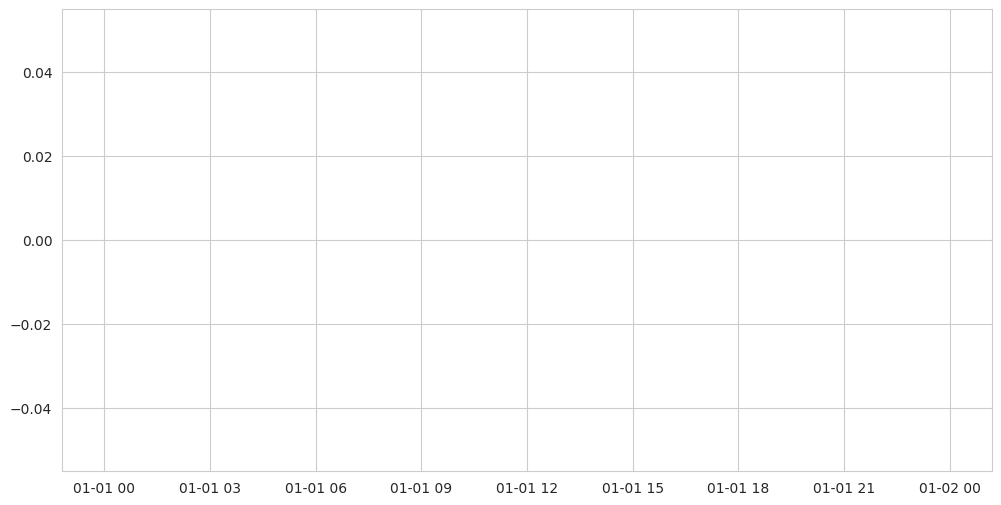

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(test.index, ses_forecast, label='SES Forecast')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.title("Model Comparison")
plt.grid(True)
plt.show()

In [50]:
best_model = arima_result if arima_rmse < ses_rmse else ses_model

future_forecast = best_model.forecast(steps=30)

plt.figure(figsize=(10, 5))
plt.plot(ts_data, label='Historical')
plt.plot(pd.date_range(ts_data.index[-1], periods=30, freq='D'), future_forecast, label='Forecast')
plt.title("30-Day Future Forecast of Selling Price")
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'arima_rmse' is not defined